# Prosper Loan Data Exploration
## by Angie Koepcke



### Preliminary Wrangling

> The Prosper Loan data set contains loan data for various types of loans from 2005 to 2014. The data file was provided by Udacity.  The loans ranged in term from 12 to 60 months.

> The first step I completed was to upload the 'prosperLoanData.csv' file to my project folder in my jupyter notebook.  This way I could run .head() and .info() on the data and get an idea of what I was looking at.  I opened the Prosper Loan Data variable definitions in Google sheets.

> I also check to make sure all the packages I needed for this project were installed.  It turned out I had to install Seaborn, so I did this in Linux. After installing Seaborn, I checked the data using .head() and .info(). 

> There were 80 columns and 113,937 rows of data in the loan data file.  I had to decide which variables I wanted to explore.  The loan listing category, which classifies what the loan was for, and the state interested me right away.  Beyond that, I decided I needed to do more exploration and make some decisions. 

> I chose to look at loans by state, occupation, and reason for the loan. The year the loan was originated was significant according the the Wikipedia page for Prosper Marketplace, because loan purchasers filed a class action lawsuit alleging Prosper sold "unqualified" loans between 2006 and 2008. Also, in 2009, Prosper increased the credit score requirements for borrowers, so this might be an interesting variable to look at.

https://en.wikipedia.org/wiki/Prosper_Marketplace

## Table of Contents   

### Univariate Exploration
    

   * [Introduction - Dataset Structures and Features](#Introduction) <a Introduction ="Introduction"></a>       
   
   * [Graph 1 - Loans by State Lollipop Chart](#Graph-1) <a Graph-1 ="Graph-1"> </a>
   
   * [Graph 2 - Loans by Category Bar Chart](#Graph-2) <a Graph-2 ="Graph-2"> </a>
   
   * [Graph-3 - Loans by Status Bar Chart](#Graph-3) <a Graph-3 ="Graph-3"> </a>
   
   * [Graph-4 -Top 10 Occupations Defaulted Loans Bar Chart](#Graph-4) <a Graph-4 ="Graph-4"> </a>
   
   * [Graph-5 - Top 10 Loan Categories Defaulted Loans Histogram](#Graph-5) <a Graph-5 ="Graph-5"> </a>
   
   * [Graph-6 - Comparing the number of loans missing state data in pre-2009 and post 2009 data](#Graph-6) <a Graph-6 ="Graph-6"> </a>
   
   * [Graph-7 - Comparing the number of defaulted loans in pre-2009 and post 2009 data](#Graph-7) <a Graph-7 ="Graph-7"> </a>
   
   * [Graph 8 - Comparing the number of loans missing occupation data in pre-2009 and post 2009 data](#Graph-8) <a Graph-8 ="Graph-8"> </a>
    
   * [Graph-9 - Comparing the category -Not Available- as the reason for the loan in pre-2009 and post 2009 defaulted loan data](#Graph-9) <a Graph-9 ="Graph-9"> </a>
   
### Bivariate Exploration

   * [Graph-10 - Comparing the lack of Borrower State information against Net Principal Loss in pre-2009 and post 2009 data](#Graph-10) <a Graph-10 ="Graph-10"> </a>
   * [Graph-11 - Loan Original Amounts per Creation Year Scatter Plot by Income Verifiable](#Graph-11) <a Graph-11 = "Graph-11"> </a>
   * [Graph-12 - Defaulted Loans per Year Violin Plot by Verified Income](#Graph-12) <a Graph-12 = "Graph-11"> </a>
   
   * [Graph-13 - Lower Credit Score Ranges for Occupation Other in pre and post 2009 Loans](#Graph-13) <a Graph-13 = "Graph-13"> </a>
   
 
### Multivariate Exploration

   * [Graph-14 - Matrix Correlation Heatmap](#Graph-14) <a Graph-14 ="Graph-14"> </a>
   
   * [Graph -15 - LP_NetPrincipalLoss Correlation Matrix](#Graph-15) <a Graph-15 ="Graph-15"> </a>
   
   * [Graph -16 - Seaborn - LP_NetPrincipalLoss](#Graph-16) <a Graph-16 ="Graph-16"> </a>
   * [Graph -17 - Seaborn - LP_NetPrincipalLoss in Lower Range Credit Scores](#Graph-17)<a Graph-17 ="Graph-17"> </a>

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from scipy.stats import norm

from matplotlib.pyplot import figure

In [2]:
# Loading in the dataset and checking the import

df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Introduction



#### Dataset Structure

   This dataset is a .csv file (comma separated values) with eighty columns and approximately 113,937 rows.  Right away I could see there were columns in formats which might not be ideal for analysis, such as ListingCreationDate. This column is an object in the original data.  I would change it to a datetime format for analysis, as well as all other date / time columns, so I could look at changes across time periods.

#### Dataset Features

   There are 81 different columns of variables for this loan data.  Some of the data is related to the borrower such as occupation, employment status and duration, public records, and credit scores.  Some of the data is analysis internally completed by Prosper, such as Prosper ratings, estimated yield, estimates for loss and return.  Some of the data is related to the status of the loan.  The data could be separated into smaller tables containing like information.  A table containing only variables relevant to the analysis plan could be made.  

#### Dataset Features of Interest

   I am interested in what the loans were for, and what states the loans were made in.  Further I'd like to look at occupations and interest rates.  Finally, I'd like to see what happened to loans.  Did certain states or occupations have similar features related to repayment or default?  The business was stopped by the SEC between November of 2008 and July of 2009, so the data should be separated in a way where we can see if investors had access to data for variables which show correlation to default in both sets of years.

## Univariate Exploration


In [4]:
# I want to make sure the loan listings are unique
df['ListingKey'].nunique()

113066

In [5]:
# I only want to analyze unique loans, so lets look at the duplicates
df_key_dups = df[df['ListingKey'].duplicated()==True]
df_key_dups.count()

ListingKey                     871
ListingNumber                  871
ListingCreationDate            871
CreditGrade                      0
Term                           871
                              ... 
PercentFunded                  871
Recommendations                871
InvestmentFromFriendsCount     871
InvestmentFromFriendsAmount    871
Investors                      871
Length: 81, dtype: int64

In [6]:
# I'm going to make a copy of the dataframe and drop the duplicates
df_new = df.copy()
##df_new.info()

In [7]:
#Drop the duplicates in 'ListingKey' and then check the row totals
df_new.drop_duplicates(subset=['ListingNumber'], keep=False, inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           112239 non-null  object 
 1   ListingNumber                        112239 non-null  int64  
 2   ListingCreationDate                  112239 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 112239 non-null  int64  
 5   LoanStatus                           112239 non-null  object 
 6   ClosedDate                           55063 non-null   object 
 7   BorrowerAPR                          112214 non-null  float64
 8   BorrowerRate                         112239 non-null  float64
 9   LenderYield                          112239 non-null  float64
 10  EstimatedEffectiveYield              83155 non-null   float64
 11  EstimatedLoss

In [8]:
# import the pandas datetimefunction
import datetime
# Change the date columns to date time format
df_new['DateCreditPulled']=pd.to_datetime(df_new['DateCreditPulled'])
df_new['ListingCreationDate']=pd.to_datetime(df_new['ListingCreationDate'])
df_new['LoanOriginationDate']=pd.to_datetime(df_new['LoanOriginationDate'])
df_new['ClosedDate']=pd.to_datetime(df_new['ClosedDate'])

In [9]:
# Get the start and end dates for the loan listing creation data
df_new['ListingCreationDate'].min(),df_new['ListingCreationDate'].max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [10]:
# Get the start and end dates for the loan origination data
df_new['LoanOriginationDate'].min(),df_new['LoanOriginationDate'].max()

(Timestamp('2005-11-15 00:00:00'), Timestamp('2014-03-12 00:00:00'))

In [11]:
# Get the start and end dates for the loan closed date
df_new['ClosedDate'].min(),df_new['ClosedDate'].max()

(Timestamp('2005-11-25 00:00:00'), Timestamp('2014-03-10 00:00:00'))

In [12]:
# I used groupby to look at the loan listings per state
state_df = df.groupby("BorrowerState")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
state_df

,BorrowerState,count
4,CA,14717
43,TX,6842
34,NY,6729
9,FL,6720
14,IL,5921
10,GA,5008
35,OH,4197
22,MI,3593
45,VA,3278
31,NJ,3097


> The loans by state analysis is sorted in descending order, showing California had the most amount of loans, and North Dakota had the fewest.  States could be divided into regions for analysis.

In [13]:
# Looking to see if any loans were missing a state value
# As an investor,  I would want to know the state and occupation for the borrower

df_new['BorrowerState'].isnull().sum()

5515

In [14]:
# Fill null state values with "NoData" so rows shows up in analysis, https://stackoverflow.com/questions/38134012/pandas-dataframe-fillna-only-some-columns-in-place
df_new.fillna({'BorrowerState':"NoData"}, inplace=True)

In [15]:

# Checking to see that all 'ListingKey' values are unique
df_new['ListingKey'].nunique()

112239

In [16]:
# New row total for Borrower State
df_new['BorrowerState'].count()

112239

In [17]:
# Looking for missing occupations
df_new['Occupation'].isnull().sum()

3473

In [18]:
# Adding missing occupation data to category zero
df_new.fillna({'Occupation':"NoData"}, inplace=True)

In [19]:
# Check the new row total for Occupation
df_new['Occupation'].count()

112239

In [20]:
# Check for missing loan category data
df_new['ListingCategory (numeric)'].isnull().sum()

0

In [21]:
# Let's see what the average loan length is
df_new['Term'].mean()

40.77203111218026

In [22]:
# Let's get the min and max loan lengths
df_new['Term'].min(), df_new['Term'].max()

(12, 60)

In [23]:
# Get rid of the NaN in lower and upper credit scores
df_new.fillna({'CreditScoreRangeLower':0}, inplace=True)
df_new.fillna({'CreditScoreRangeUpper':0}, inplace=True)

In [24]:
# Code to check credit scores aren't missing

df_new['CreditScoreRangeUpper'].isnull().sum(), df_new['CreditScoreRangeLower'].isnull().sum()

(0, 0)

In [25]:
# Fill in missing loan status data
df_new.fillna({'LoanStatus':"NoData"}, inplace=True)
df_new['LoanStatus'].isnull().sum()

0

In [26]:
# Add a copy of the new csv file to the project
df_new_1 = df_new.copy()

## Graph-1

[Loans by State Lollipop Chart ](#Introduction) <a Introduction ="Introduction"> </a>

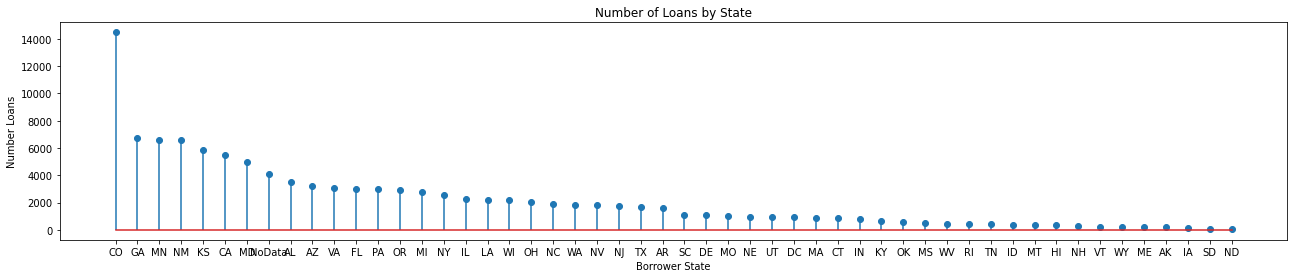

In [27]:
# I made a lollipop chart to see which states had the most loans and which had the least amount of loans
# It took me a few tries to get the x axis to show the states, https://www.data-to-viz.com/graph/lollipop.html
# I needed help to size the chart, https://python-graph-gallery.com/180-basic-lollipop-plot/
# The data-to-viz.com website said the lollipop chart was a good choice for a categorical variable mized with numbers
# I needed help in changing the figure size, https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

figure(figsize=(22,4))
x = df_new_1['BorrowerState'].unique()
lollipop = df_new_1.BorrowerState.value_counts()


plt.stem(x, lollipop)


plt.title("Number of Loans by State")


plt.xlabel("Borrower State")
plt.ylabel("Number Loans")

plt.show()


### State Lollipop Chart
  California, Texas, Florida, New York, and Illinois had the most amount of loans.  There are a significant number of loans with "NoData" for the state value. I would like to compare the number of loans with 'NoData' for the 'BorrowerState' column for the pre-2009 and post-2009 groups. 
  The 'BorrowerState' is a nominal, categorical value. The number of loans per state could be analyzed by geographic region instead of state, however, I don't think this is a significant variable at this time.

In [28]:
# The occupations and number of loans associated with each occupation #https://stackoverflow.com/questions/40454030/count-and-sort-with-pandas
occupation_df = df_new_1.groupby("Occupation")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False).head(10)
occupation_df

,Occupation,count
36,Other,28242
42,Professional,13440
12,Computer Programmer,4407
19,Executive,4250
60,Teacher,3699
1,Administrative Assistant,3666
2,Analyst,3554
32,NoData,3473
48,Sales - Commission,3384
0,Accountant/CPA,3185


In [29]:
# I noticed there was a column for whether or not the person had verifiable income. 
# I was surprised to see Prosper gave loans to people who didn't have verifiable income
df_new_1.query('IncomeVerifiable == False').count()

ListingKey                     8508
ListingNumber                  8508
ListingCreationDate            8508
CreditGrade                    1325
Term                           8508
                               ... 
PercentFunded                  8508
Recommendations                8508
InvestmentFromFriendsCount     8508
InvestmentFromFriendsAmount    8508
Investors                      8508
Length: 81, dtype: int64

In [30]:
# Let's look at the Listing Category data
df_new_1['ListingCategory (numeric)'].describe()

count    112239.000000
mean          2.779159
std           3.999273
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: ListingCategory (numeric), dtype: float64

In [31]:
# I'm going to rename this column Listing Category because it uses parentheses
df_new_1.rename(columns = {'ListingCategory (numeric)': 'Listing_Category'}, inplace = True)

In [32]:
# Check the renaming code
df_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           112239 non-null  object        
 1   ListingNumber                        112239 non-null  int64         
 2   ListingCreationDate                  112239 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 112239 non-null  int64         
 5   LoanStatus                           112239 non-null  object        
 6   ClosedDate                           55063 non-null   datetime64[ns]
 7   BorrowerAPR                          112214 non-null  float64       
 8   BorrowerRate                         112239 non-null  float64       
 9   LenderYield                          112239 non-null  float64       
 

In [33]:
df_new_1['Listing_Category'].value_counts()

1     56977
0     16965
7     10403
2      7345
3      7127
6      2564
4      2395
13     1978
15     1493
18      879
14      851
19      760
5       756
20      753
16      304
11      211
8       193
10       91
9        85
12       57
17       52
Name: Listing_Category, dtype: int64

## Graph-2

[Loans by Category Bar Chart](#Introduction) <a Introduction ="Introduction"> </a>

Text(0, 0.5, 'Loans')

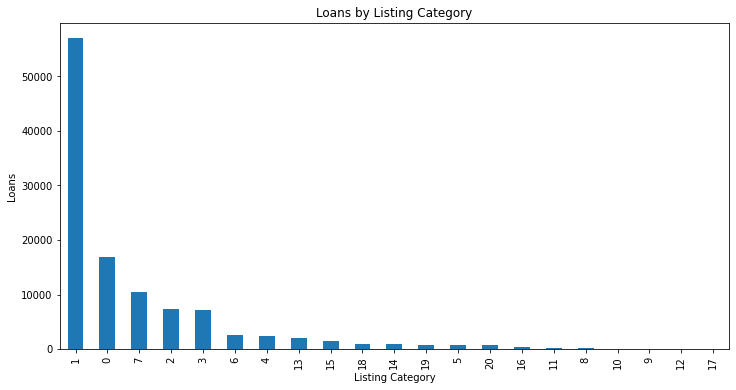

In [34]:
# A bar chart of the loan listing category to see which loan type was most popular
df_new_1['Listing_Category'].value_counts().plot(kind='bar',figsize=(12,6));

plt.title("Loans by Listing Category")


plt.xlabel("Listing Category")
plt.ylabel("Loans")

### Listing Category Bar Chart
 The category '1 - Debt Consolidation' was the most common reason a borrower sought a loan. The second most common reason was category '0 - Not Available'. I would like to compare the categories 'Not Available' and 'Debt Consolidation' in the pre-2009 years and the post-2009 years.

Listing Category Key: 
 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [35]:
# Let's look at the value counts for the loan status
df_new_1['LoanStatus'].value_counts()

Current                   54928
Completed                 38048
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        794
Past Due (31-60 days)       359
Past Due (61-90 days)       309
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [36]:
# Total completed and current loans
df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Current'].count()+df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Completed'].count()

92976

In [37]:
# Total amount of non-duplicated loans
df_new_1['LoanStatus'].count()

112239

In [38]:
# Percentage of loans complete or current
(df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Current'].count()+df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Completed'].count())/df_new_1['LoanStatus'].count()

0.8283751637131478

In [39]:
# Percentage of total loans which are current
df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Current'].count()/df_new_1['LoanStatus'].count()

0.4893842603729541

In [40]:
# Number of current loans
df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Current'].count()

54928

In [41]:
# Number of loans still in process
active_loans = df_new_1['LoanStatus'].count()-df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Completed'].count()-df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Chargedoff'].count()-df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Defaulted'].count()-df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Cancelled'].count()
active_loans

57176

In [42]:
# Number of loans defaulted, charged-off, or cancelled
dead_loans = df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Chargedoff'].count()+df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Defaulted'].count()+df_new_1['ListingKey'][df_new_1['LoanStatus'] == 'Cancelled'].count()
dead_loans

17015

In [43]:
# Percentage of dead loans compared to the total number of loans
dead_loans / df_new_1['LoanStatus'].count()

0.1515961475066599

## Graph-3

[Loan Status Bar Chart](#Introduction) <a Introduction ="Introduction"> </a>

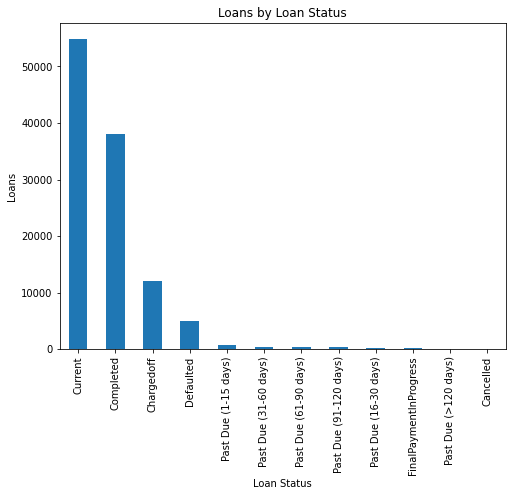

In [44]:
# Bar chart of the number of loans and their loan status

df_new_1['LoanStatus'].value_counts().plot(kind='bar',figsize=(8,6));
plt.title("Loans by Loan Status")


plt.xlabel("Loan Status")
plt.ylabel("Loans")
plt.show();

### Bar chart of the loan status

  The bar chart shows the majority of the total loans were completed or current at the time of this collection of data.  Analysis could be done based on pre-2009 vs post-2009, 'Defaulted', 'Chargedoff','Cancelled', or 'Past Due...' data.  At the time of this data collection by Prosper, there was a potential for 57,176 loans to go into default and about 15% of the total number of loans given by Prosper were either charge-offs, defaulted ot cancelled. Analyzing the default probability of the loans at periodic intervals woud be something I would like to see as an investor.

## Graph-4

[Top 10 Occupations Defaulted Loans Bar Chart](#Introduction) <a Introduction ="Introduction"> </a>

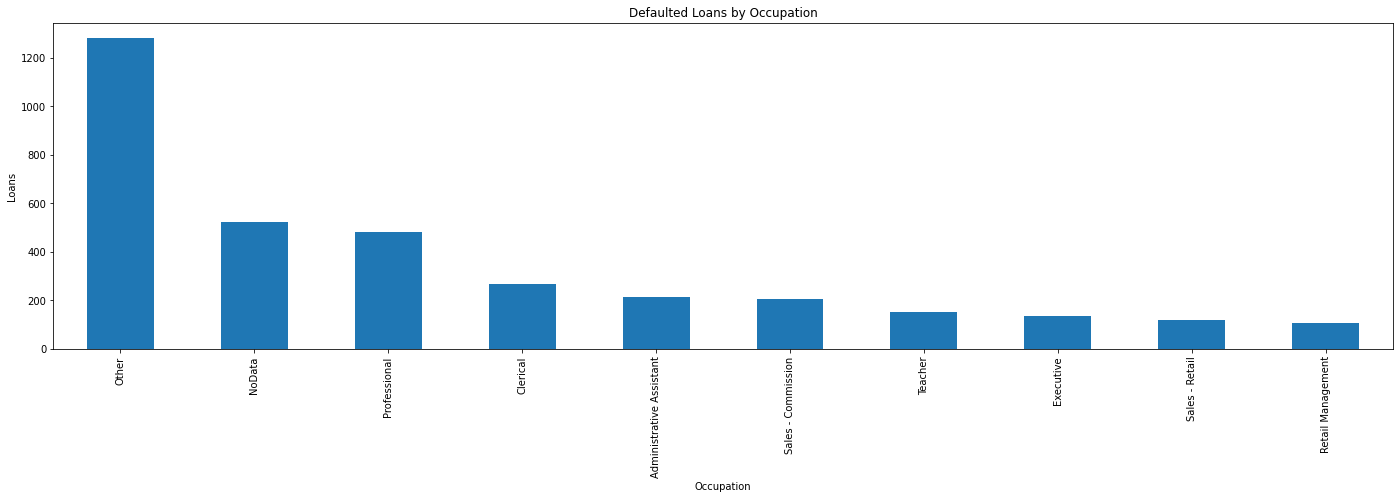

In [45]:
# Value counts for the Listing Category on defaulted loan
df_defaulted = df_new_1.query('LoanStatus == "Defaulted"')

df_defaulted['Occupation'].value_counts().nlargest(10).plot(kind='bar', figsize=(24,6))

plt.title("Defaulted Loans by Occupation")


plt.xlabel("Occupation")
plt.ylabel("Loans")
plt.show();

### Most Popular Ocupation Category for Defaulted Loans

   The most popular occupation category for defaulted loans was 'Other'.  I would like to compare the nominal, categorical variable occupation in the pre-2009 years and post-2009 years to see if this missing/unqualified data shows a correlation to predicting risk.  The variable shows a risk correlation, but was this variable more present in the pre-2009 or post-2009 data?

## Graph-5

[Top 10 Loan Categories Defaulted Loans Bar Chart](#Introduction) <a Introduction ="Introduction"> </a>

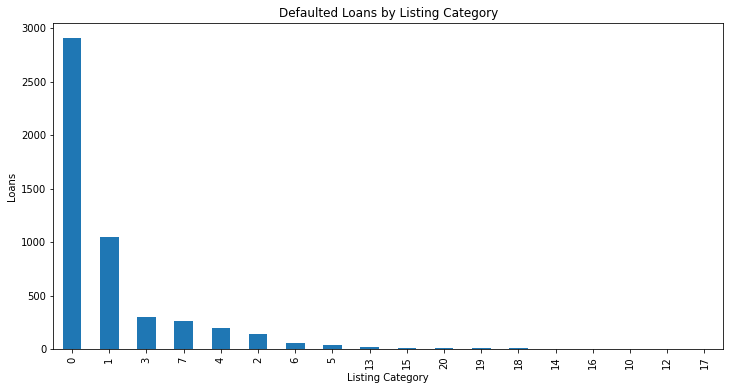

In [46]:
# A bar chart of the defaulted loan listing category to see which loan type was most popular
df_defaulted['Listing_Category'].value_counts().plot(kind='bar',figsize=(12,6));

plt.title("Defaulted Loans by Listing Category")


plt.xlabel("Listing Category")
plt.ylabel("Loans")
plt.show();

 Here you can see  the most common loan category for defaulted loans is 'Not Available'.  Is the loan listing category variable more prevelant in pre-2009 loans, or post-2009 loans?

Listing Category Key: 
 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [47]:
# I used groupby to look at the defaulted loan listings per state
state_df_defaulted = df_defaulted.groupby("BorrowerState")['ListingKey'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
state_df_defaulted

,BorrowerState,count
4,CA,732
35,NoData,589
10,GA,343
44,TX,342
14,IL,337
9,FL,222
22,MI,199
24,MO,193
48,WA,158
36,OH,151


In [48]:
# The max term for the loans are 60 months, or 5 years.  
# The term for defaulted loans isn't much less than the average term for all of the loans.

df_defaulted['Term'].mean()

36.841769629334394

In [49]:
# Default rate for California
df_defaulted.query('BorrowerState == "CA"').BorrowerState.count()/df_new_1.query('BorrowerState == "CA"').BorrowerState.count()

0.0505524861878453

In [50]:
# Average default rate for all loans
df_new_1.query('LoanStatus == "Defaulted"').LoanStatus.count()/df_new_1['LoanStatus'].count()

0.044708167392795733

In [51]:
# Let's look at the default rate for Georgia
df_defaulted.query('BorrowerState == "GA"').BorrowerState.count()/df_new_1.query('BorrowerState == "GA"').BorrowerState.count()

0.06936299292214358

In [52]:
# Let's look at the default rate for Texas
df_defaulted.query('BorrowerState == "TX"').BorrowerState.count()/df_new_1.query('BorrowerState == "TX"').BorrowerState.count()

0.050809686525033426

In [53]:
# Let's look at the default rate for Missouri
df_defaulted.query('BorrowerState == "MO"').BorrowerState.count()/df_new_1.query('BorrowerState == "MO"').BorrowerState.count()

0.07477721813250678

In [54]:
# Let's look at the default rate for Colorado
df_defaulted.query('BorrowerState == "CO"').BorrowerState.count()/df_new_1.query('BorrowerState == "CO"').BorrowerState.count()

0.033640552995391704

In [55]:
# This code creates a year column so I can look at the defaulted loans by year
df_new_1['Listing_Creation_Year']=df_new_1['ListingCreationDate'].dt.year

# Check the new column to see if the years are there
df_new_1['Listing_Creation_Year'].head()

0    2007
1    2014
2    2007
3    2012
4    2013
Name: Listing_Creation_Year, dtype: int64

In [56]:
# This codes shows the number of loans created per year
df_new_1['Listing_Creation_Year'].value_counts()

2013    34204
2012    19556
2007    11557
2011    11442
2008    11263
2014    10245
2006     6213
2010     5530
2009     2206
2005       23
Name: Listing_Creation_Year, dtype: int64

In [57]:
df_new_1.query('Listing_Creation_Year == "2007"').head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Listing_Creation_Year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,258,2007
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,41,2007
11,0F1734025150298088A5F2B,213551,2007-10-09 20:28:33.640,C,36,Completed,2008-01-07,0.15033,0.1325,0.1225,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53,2007
21,1017340630713945364DA6B,241498,2007-11-30 20:33:49.227,D,36,Completed,2010-12-12,0.21488,0.2075,0.1975,...,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53,2007
42,10AD33803102786533722BB,93263,2007-02-04 17:24:27.850,HR,36,Chargedoff,2008-08-08,0.30300,0.2900,0.2850,...,0.0,1096.92,1096.92,0.0,1.0,0,0,0.0,15,2007


In [58]:
# Lets create our new column for pre-2009 SEC intervention and post-2009 SEC intervention


df_new_1['pre-2009']= np.where(df_new_1['Listing_Creation_Year']< 2009, True, False)

df_new_1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Listing_Creation_Year,pre-2009
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013,False


## Graph-6

[Comparing the number of loans missing state data in pre-2009 and post 2009 data](#Introduction) <a Introduction ="Introduction"> </a>

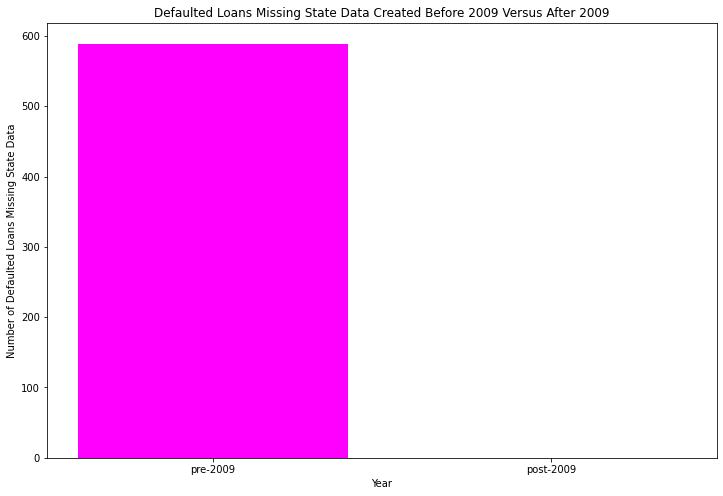

In [59]:
#Let's create the dataframe for this analysis of missing state data in defaulted loans prior to 2009

df_defaulted = df_new_1.query('LoanStatus == "Defaulted"')
df_defaulted_pre_2009 = df_defaulted[df_defaulted['pre-2009']== True]
df_defaulted_post_2009 = df_defaulted[df_defaulted['pre-2009']==False]

pre_2009_missing_state =df_defaulted_pre_2009[df_defaulted_pre_2009['BorrowerState'] == "NoData"].BorrowerState.count()
post_2009_missing_state =df_defaulted_post_2009[df_defaulted_post_2009['BorrowerState'] == "NoData"].BorrowerState.count()

figure(figsize=(12,8))

plt.bar(["pre-2009","post-2009"],[pre_2009_missing_state, post_2009_missing_state], color='magenta')
plt.title("Defaulted Loans Missing State Data Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans Missing State Data");

In [60]:
pre_2009_missing_state, post_2009_missing_state

(589, 0)

We can see that no loans are missing the borrower's state data after 2009.  We could ask, if the borrower's loan is missing the borrower's state data, what is the probability the loan will default?

## Graph-7

[Comparing the number of defaulted loans in pre-2009 and post 2009 data](#Introduction) <a Introduction ="Introduction"> </a>

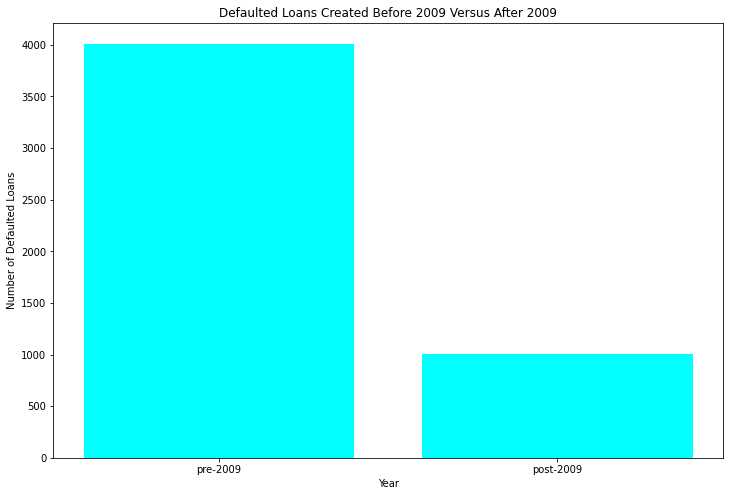

In [61]:
#Let's create the dataframe for this analysis of defaulted loans prior to 2009


pre_2009_loans = df_defaulted[df_defaulted['pre-2009']== True].LoanStatus.count()
post_2009_loans = df_defaulted[df_defaulted['pre-2009']== False].LoanStatus.count()

# Let's graph the difference in defaulted loans between the pre-2009 data and the post-2009 data

figure(figsize=(12,8))

plt.bar(["pre-2009","post-2009"],[pre_2009_loans, post_2009_loans], color='cyan')
plt.title("Defaulted Loans Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans");



In [62]:
df_defaulted[df_defaulted['pre-2009']== True].LoanStatus.count(),df_defaulted[df_defaulted['pre-2009']== False].LoanStatus.count()

(4012, 1006)

The graph shows there were 4012 defaulted loans in the pre-2009 data, and only 1006 defaulted loans in the post-2009 data.

## Graph-8

[Comparing the number of loans missing occupation data in pre-2009 and post 2009 data](#Introduction) <a Introduction ="Introduction"> </a>

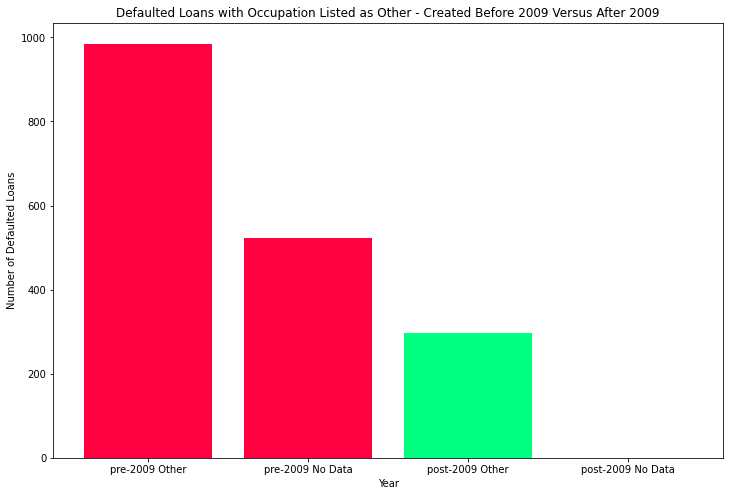

In [63]:
#Let's create the dataframe for this analysis of defaulted loans prior to 2009


pre_2009_occ_other = df_defaulted_pre_2009[df_defaulted_pre_2009['Occupation']== "Other"].Occupation.count()
pre_2009_occ_nodata = df_defaulted_pre_2009[df_defaulted_pre_2009['Occupation']== "NoData"].Occupation.count()
post_2009_occ_other = df_defaulted_post_2009[df_defaulted_post_2009['Occupation']== "Other"].Occupation.count()
post_2009_occ_nodata = df_defaulted_post_2009[df_defaulted_post_2009['Occupation']== "NoData"].Occupation.count()

# Let's graph the difference in defaulted loans between the pre-2009 data and the post-2009 data
# Hexchrome guide, https://www.w3schools.com/colors/colors_picker.asp

figure(figsize=(12,8))

plt.bar(["pre-2009 Other","pre-2009 No Data", "post-2009 Other", "post-2009 No Data"],[pre_2009_occ_other, pre_2009_occ_nodata, post_2009_occ_other, post_2009_occ_nodata], color =['#ff0040', '#ff0040', '#00ff80', '#00ff80'])
plt.title("Defaulted Loans with Occupation Listed as Other - Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans");


In [64]:
pre_2009_occ_other, pre_2009_occ_nodata, post_2009_occ_other, post_2009_occ_nodata

(985, 522, 296, 0)

The graph shows that there were more defaulted loans given to borrowers with the occupation listed as "Other" in the pre-2009 data than in the post-2009 data.  There were also 522 defaulted loans in the pre-2009 data which didn't have an occupation listed.

## Graph-9

[Comparing the category -Not Available- as the reason for the loan in pre-2009 and post 2009 defaulted loan data](#Introduction) <a Introduction ="Introduction"> </a>

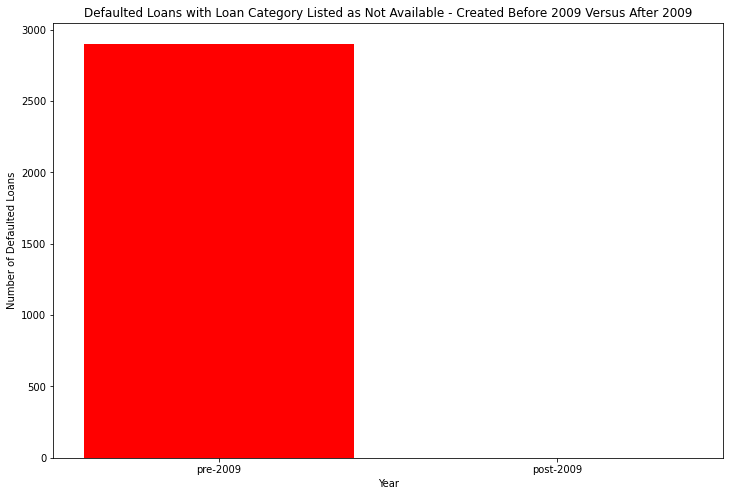

In [65]:
#Let's create the dataframe for this analysis of loan listing category 0-  "Not Available" for defaulted loans prior to 2009


df_pre_2009_no_cat = df_defaulted_pre_2009[df_defaulted_pre_2009['Listing_Category']== 0].Occupation.count()
df_post_2009_no_cat = df_defaulted_post_2009[df_defaulted_post_2009['Listing_Category']== 0].Occupation.count()

# Let's graph the difference in defaulted loans between the pre-2009 data and the post-2009 data

figure(figsize=(12,8))

plt.bar(["pre-2009","post-2009"],[df_pre_2009_no_cat, df_post_2009_no_cat], color='red')
plt.title("Defaulted Loans with Loan Category Listed as Not Available - Created Before 2009 Versus After 2009")
plt.xlabel("Year")
plt.ylabel("Number of Defaulted Loans");

In [66]:
df_pre_2009_no_cat, df_post_2009_no_cat

(2903, 0)

The graph show that missing loan listing category data, or the reason a borrower was getting the loan, was only missing in the pre-2009 data.  This data is for defaulted loans.

In [67]:
# Add a copy of the new csv file to the project
df_new_1.to_csv('Prosper-df_new_1.csv')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

  There are 5515 loans with "NoData" for the state value. All the defaulted loans also missing borrower state data were created prior to 2009. The 'BorrowerState' is a nominal, categorical value. The number of loans per state could be analyzed by geographic region instead of state, however, I don't think this is a significant variable at this time.
  
  The category '1 - Debt Consolidation' was the most common reason a borrower sought a loan. The second most common reason was category '0 - Not Available'. Defaulted loans created after 2009 aren't missing loan listing category data, so it appears the lender strengthened their borrower requirements where state and reason for obtaining the loan were required to be provided for the borrower.
  
  
 
 The top occupation was 'Other'.  The pre-2009 data had loans given to borrowers where there wasn't any data available for some borrowers' occupations. This surprised me because it seems like information which a lender would naturally have during the income verification process. Also, incomplete or vague data doesn't look good in an investment report. 



 I would like to see which states, occupations or time periods correlated with the losses and see if these variables or other variables like Prosper rating would be useful in predicting future losses.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 I changed the date columns to a datetime format so I could put the losses in a chart to see if one year between 2005 and 2014 was significant compared to the others in future analysis.  Doing this also allowed me to get a date range.  I also removed duplicated rows of data. 

I replace NaN values for missing occpation or borrower state data with the term "NoData".  "NoData" is a category which can be compared in the pre and post 2009 datasets.

## Bivariate Exploration

> The bivariate exploration section below looks at the relationships between state, occupation, and loan category on defaulted loans.  Comparing the variables here will help me see what is going on with the loans in this data set from a humanistic stand point. Some of the variables which interest me include net principal losses whether the borrower had verifiable income or not, and creditscore range. I plan to compare these against the state, occupation, and loan category variables.


## Graph-10

[Comparing the lack of Borrower State information against Net Principal Loss in pre-2009 and post 2009 data](#Introduction) <a Introduction ="Introduction"> </a>

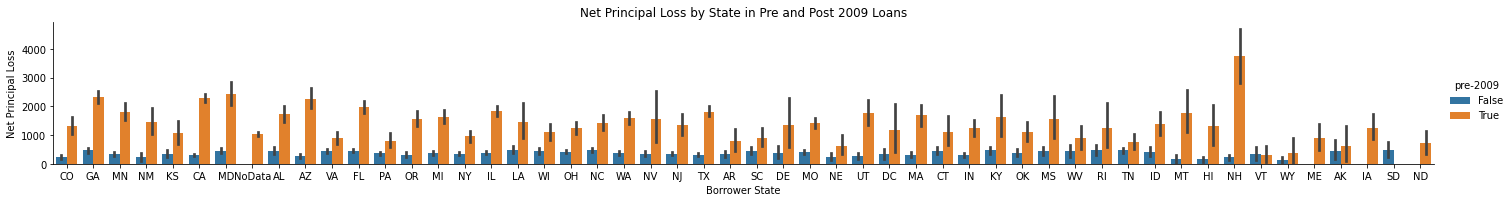

In [68]:
# At this point in the exploration, I am comparing some key variables in the years pre-2009 and post-2009
# Let's look at the lack of borrower state information in the pre-2009 and post-2009 data



sns.catplot(x="BorrowerState", y="LP_NetPrincipalLoss", hue="pre-2009", kind="bar", data=df_new_1, height = 2.5, aspect = 8)

plt.title("Net Principal Loss by State in Pre and Post 2009 Loans")


plt.xlabel("Borrower State")
plt.ylabel("Net Principal Loss")

plt.show()

The graph shows that most of the losses occurred in the pre-2009 group of loans.  We can also see that all of the loans created after 2008 had a state attributed to them.  Let's take a closer look at the missing state attribute in the pre-2009 data for defaulted loans.

New Hampshire had the highest amount of net principal losses in the pre-2009 data. What was happening in New Hamphsire?  Another possible variable to explore would be loan listing category for New Hampshire. What were borrowers in New Hamphire using the loans for?

## Graph-11

[Loan Original Amounts per Creation Year Scatter Plot by Income Verifiable](#Introduction) <a Introduction ="Introduction"> </a>

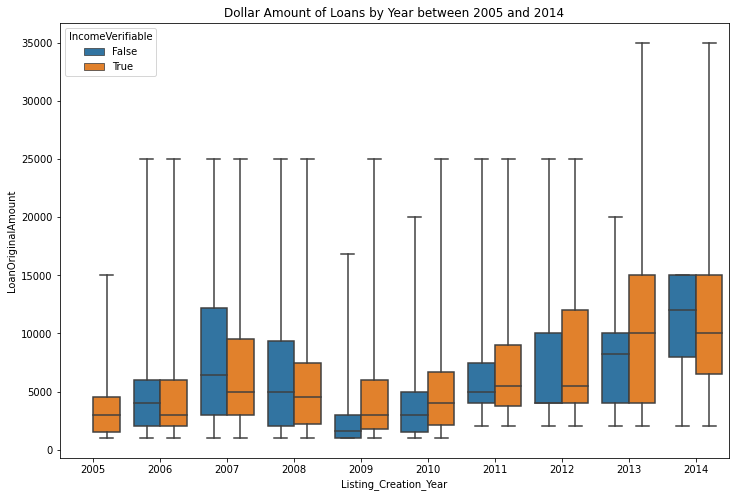

In [69]:
# The box plot below shows the dollar amount of loans per year by loan amount, code provided by a Udacity reviewer

figure(figsize=(12,8))

ax = sns.boxplot(data = df_new_1, x="Listing_Creation_Year", y="LoanOriginalAmount", hue="IncomeVerifiable", whis=np.inf)
plt.title("Dollar Amount of Loans by Year between 2005 and 2014")
plt.show()

 The box plot above is showing loan amounts per year by creation date.  It appears the dollar volume of the loans increased between 2005 and 2014. I'm surprised at the amount of loans without verifiable income in all years.  It looks like 2007 had a significant amount of loans without verifiable income.

## Graph-12

[Defaulted Loans per Year Violin Plot by Verified Income](#Introduction) <a Introduction ="Introduction"> </a>

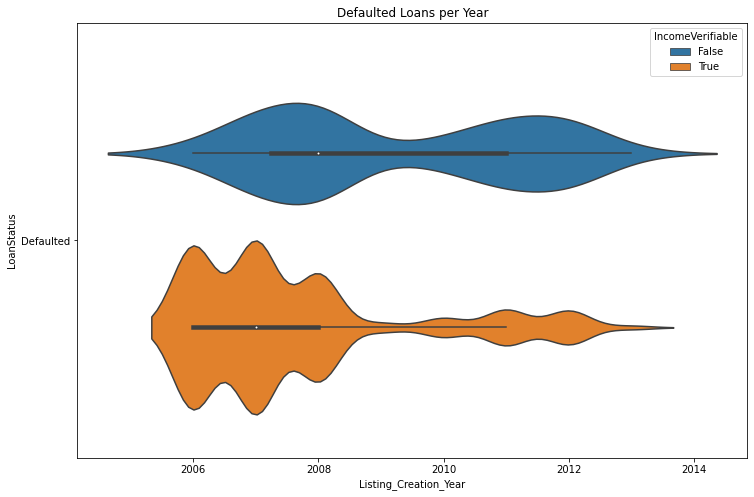

In [70]:
# This violin plot below shows the number of defaulted loans per year, 

figure(figsize=(12,8))

df_defaulted = df_new_1.query('LoanStatus == "Defaulted"')

ax = sns.violinplot(data=df_defaulted, x='Listing_Creation_Year', y='LoanStatus', hue='IncomeVerifiable')

plt.title("Defaulted Loans per Year");


 The violin plot above shows most of the defaulted loans created were in the years between 2006 and 2008. The two variables being compared here are the years, and the 'defaulted' loan status.  The years are a significant variable because there is an assertion by a class action lawsuit that Prosper knowingly sold unqualified loans.  It would be a good idea to see which variables correlate with defaulted loans, and then the difference between available data for those loans before 2009 and after 2009. It doesn't appear the income verifiable variable is significant.

## Graph-13

[Lower Credit Score Ranges for Occupation Other in pre and post 2009 Loans](#Introduction) <a Introduction ="Introduction"> </a>

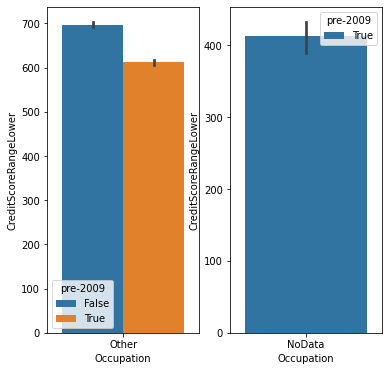

In [71]:
# Let's look at the occupation 'Other' and the lower range credit scores variables for pre and post 2009 defaulted loans

fig, axes =plt.subplots(1,2, figsize=(6,6))

df_defaulted = df_new_1.query('LoanStatus == "Defaulted"')
df_defaulted_occ_other = df_defaulted[df_defaulted['Occupation']== "Other"]
df_defaulted_occ_nodata = df_defaulted[df_defaulted['Occupation']== "NoData"]

sns.barplot(x="Occupation", y="CreditScoreRangeLower", hue="pre-2009", data=df_defaulted_occ_other, orient='v',ax=axes[0]),
sns.barplot(x="Occupation", y="CreditScoreRangeLower", hue="pre-2009", data=df_defaulted_occ_nodata, orient='v',ax=axes[1]);

There weren't any loans created after 2009 that were missing occupation data.  The loans associated with no occupation data were lower in credit score range.  If occupation is considered a qualifying factor for a loan, it appears loans created before 2009 were more likely to be missing this data.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loans missing state data were associated with net principal losses.  Loans created after 2009 weren't missing state data. Verifiable income didn't seem to be a significant factor when compared to loan amounts and defaulted loans. Loans created before 2009 were more likely to default. Loans with missing occupation data seemed more likely to have lower credit scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It appears most of the Prosper loans were created in between 2012 and 2014.  The least amount of loans were created in 2009. The histogram above shows most of the defaulted loans created were in the years between 2006 and 2008. 

 The average loan length was 40.77 and the average loan length for defaulted loans was 36.84.  This difference didn't seem significant to me overall, as something which might predict a default on a loan.
 
 The fact that verifiable income wasn't a significant variable in loan amounts was interesting.  Is verifiable income related to defaulted loans, or is this variable insignificant in general?

## Multivariate Exploration



In [72]:
# https://www.kaggle.com/xdurana/multivariate-analysis-and-correlation-matrix
# Create a table to run a correlation matrix analysis
# Create a list to grab column names
list(df_new_1)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'Listing_Category',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage

In [73]:
# Creating a new Dataframe to run the correlation matrix on
matrix_df = df_new_1[['ListingNumber',
 'Term',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'Listing_Category',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanCurrentDaysDelinquent',
 'LoanFirstDefaultedCycleNumber',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginalAmount',
 'MemberKey',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
 'LP_CollectionFees',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'PercentFunded',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'InvestmentFromFriendsAmount',
 'Investors',
 'Listing_Creation_Year']]


In [74]:
# Checking to see if the code was successful
matrix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112239 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        112239 non-null  int64  
 1   Term                                 112239 non-null  int64  
 2   BorrowerAPR                          112214 non-null  float64
 3   BorrowerRate                         112239 non-null  float64
 4   LenderYield                          112239 non-null  float64
 5   EstimatedEffectiveYield              83155 non-null   float64
 6   EstimatedLoss                        83155 non-null   float64
 7   EstimatedReturn                      83155 non-null   float64
 8   ProsperRating (numeric)              83155 non-null   float64
 9   ProsperScore                         83155 non-null   float64
 10  Listing_Category                     112239 non-null  int64  
 11  EmploymentSta

## Graph-14

[Matrix Correlation Heatmap](#Introduction) <a Introduction ="Introduction"> </a>

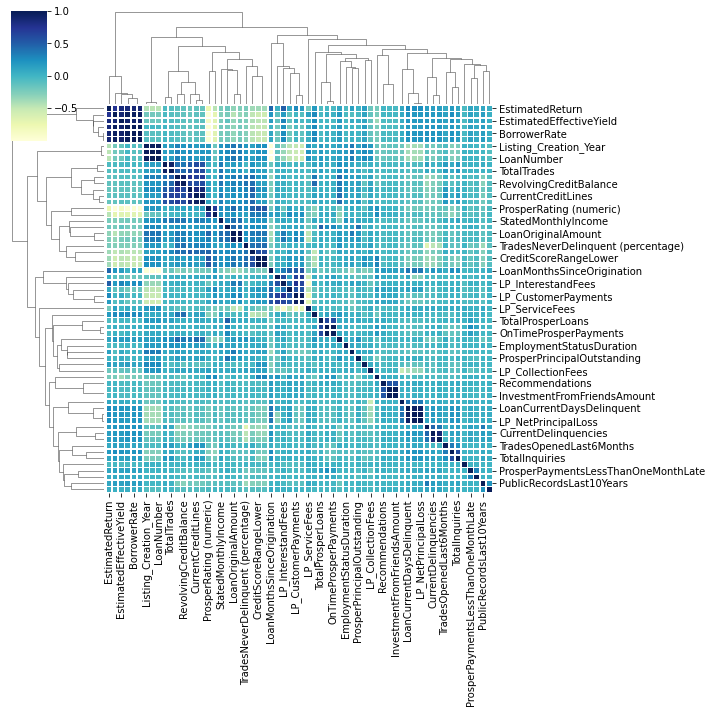

In [75]:
# correlation matrix
corrmat = matrix_df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.6);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

## Graph-15

[LP_NetPrincipalLoss Correlation Matrix](#Introduction) <a Introduction ="Introduction"> </a>

<AxesSubplot:>

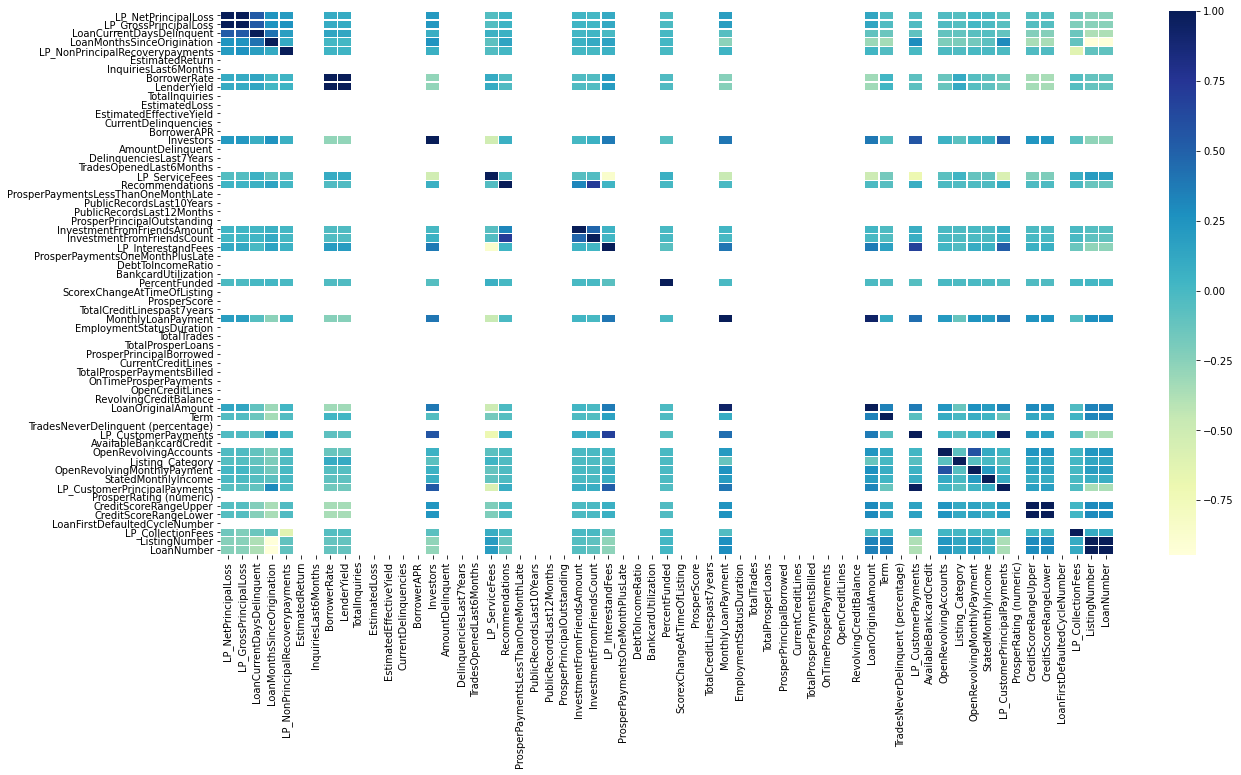

In [76]:
# LP_NetPrincipalLoss Correlation Matrix
k = 61 # of variables for heatmap total 62 
cols = corrmat.nlargest(k, 'LP_NetPrincipalLoss')['LP_NetPrincipalLoss'].index
cm = np.corrcoef(matrix_df[cols].values.T)
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths= 0.5, yticklabels=cols.values, xticklabels=cols.values)

> Some variables should be removed for this to be an effective visual analysis of LP_NetPrincipalLossCorrelation.

> LP_CurrentDaysDelinquent appears to visually correlate with LP_NetPrincipalLoss.


In [77]:
# Let's graph a characteristics we are looking at and another feature against LP_NetPrincipalLoss: 
# Listing Category - reason for the loan & Open Revolving Accounts 

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [78]:
# Create a new dataframe for analysis
stats_df = df_new_1.query('LP_NetPrincipalLoss > 0')
stats_df['LP_NetPrincipalLoss'].count()

16646

In [79]:
# Change datatypes on columns for multivariate analysis: 
# 'LP_NetPrincipalLoss',InvestmentFromFriendsAmount','OpenRevolvingAccounts'
stats_df.LP_NetPrincipalLoss.astype(int)


15        3790
17        6012
23        1882
42        1096
57        1569
          ... 
113904    6682
113905    3325
113914    2883
113918    2176
113926    2536
Name: LP_NetPrincipalLoss, Length: 16646, dtype: int64

In [80]:
stats_df.InvestmentFromFriendsAmount.astype(int)

15        0
17        0
23        0
42        0
57        0
         ..
113904    0
113905    0
113914    0
113918    0
113926    0
Name: InvestmentFromFriendsAmount, Length: 16646, dtype: int64

In [81]:
stats_df.OpenRevolvingAccounts.astype(int)

15         5
17        16
23         5
42         0
57        14
          ..
113904    10
113905    15
113914     0
113918    17
113926     0
Name: OpenRevolvingAccounts, Length: 16646, dtype: int64

In [82]:
# Check the new stats dataframe
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16646 entries, 15 to 113926
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           16646 non-null  object        
 1   ListingNumber                        16646 non-null  int64         
 2   ListingCreationDate                  16646 non-null  datetime64[ns]
 3   CreditGrade                          10462 non-null  object        
 4   Term                                 16646 non-null  int64         
 5   LoanStatus                           16646 non-null  object        
 6   ClosedDate                           16646 non-null  datetime64[ns]
 7   BorrowerAPR                          16646 non-null  float64       
 8   BorrowerRate                         16646 non-null  float64       
 9   LenderYield                          16646 non-null  float64       
 10  Estimate

## Graph-16

[Seaborn - LP_NetPrincipalLoss](#Introduction) <a Introduction ="Introduction"> </a>

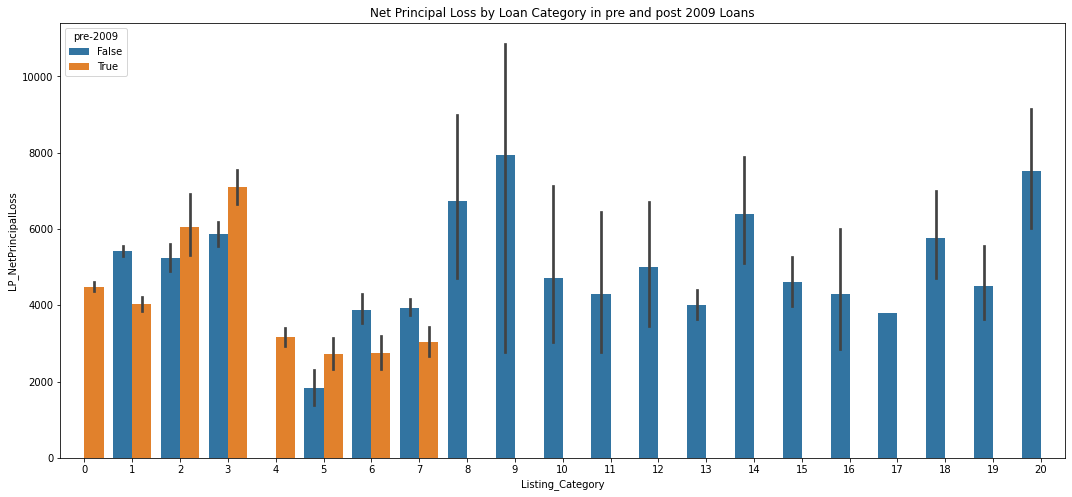

In [83]:
# Seaborn visualiztion, https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial through Udacity help section
figure(figsize=(18,8))
sns.barplot(x='Listing_Category', y='LP_NetPrincipalLoss', hue='pre-2009', data=stats_df);
plt.title('Net Principal Loss by Loan Category in pre and post 2009 Loans')
plt.show()

 This visualization shows that listing category does have an impact on net losses, but pre-2009 loans had more losses in categories one through seven.
 
 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [84]:
# A linear regression model, https://datatofish.com/statsmodels-linear-regression/
x = stats_df[['CreditScoreRangeUpper','CreditScoreRangeLower']]
y = stats_df['LP_NetPrincipalLoss']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

predictions = model.predict(x)

print_model = model.summary()

print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     LP_NetPrincipalLoss   R-squared:                       0.134
Model:                             OLS   Adj. R-squared:                  0.134
Method:                  Least Squares   F-statistic:                     1285.
Date:                 Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                         11:36:46   Log-Likelihood:            -1.6211e+05
No. Observations:                16646   AIC:                         3.242e+05
Df Residuals:                    16643   BIC:                         3.243e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3486.9898    312.105     11.172      0.000    2875.231    4098.749
CreditScoreRangeUpper  -545.2241     20.426    -26.693      0.000    -585.261    -505.187
CreditScoreRangeLower   563.2536     20.638     27.292      0.000     522.801     603.706
==============================================================================
Omnibus:                     5641.620   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18013.788
Skew:                           1.756   Prob(JB):                         0.00
Kurtosis:                       6.694   Cond. No.                     9.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Graph-17

In [ ]:
[Seaborn - LP_NetPrincipalLoss in Lower Range Credit Scores](#Introduction) <a Introduction ="Introduction"> </a>

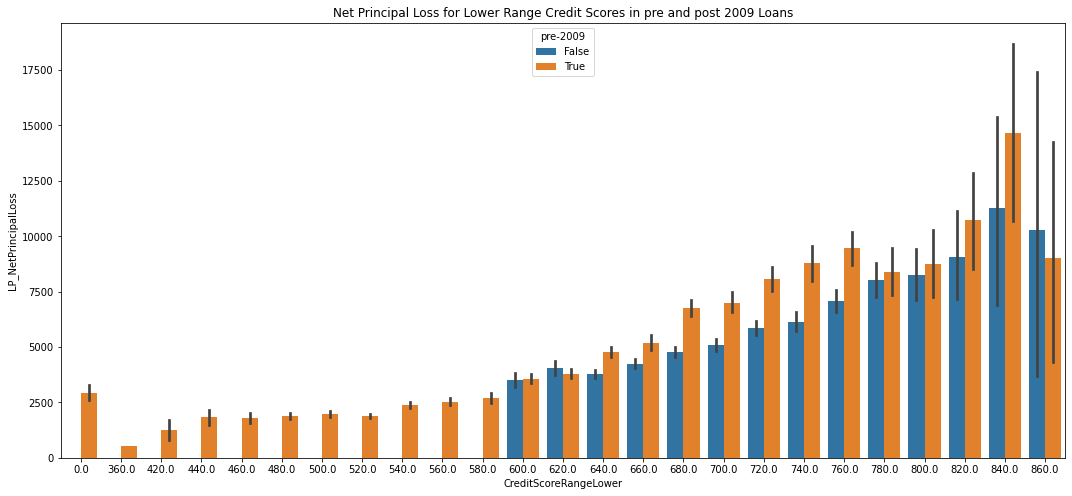

In [85]:
# Net principal loss in lower range credit scores

figure(figsize=(18,8))

sns.barplot(x='CreditScoreRangeLower', y='LP_NetPrincipalLoss', hue='pre-2009', data=stats_df);

plt.title('Net Principal Loss for Lower Range Credit Scores in pre and post 2009 Loans')

plt.show()


Here we can see the loan credit score requirements increased after 2009.  The Wikipedia article mentioned this.  Let's see if credit scores correlate with loan status.

In [149]:
# Get dummie variables for loan status for multivariate analysis



#df_new_1[['Cancelled','Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','NoData', 'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)']] = pd.get_dummies(df_new_1['LoanStatus'])

In [87]:
# Add a copy of the new csv file to the project
df_new_1.to_csv('Final-Prosper-DF.csv')

### 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 The loan listing category had a correlation with the loans in terms of contributing to net losses.

### Were there any interesting or surprising interactions between features?

 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!